## 1. Canny Edge Detection

Canny edge detection consists of multiple steps:
1. Noise reduction using Gaussian filter.
2. Gradient calculation in the x and y directions.
3. Non-maximum suppression to thin out edges.
4. Double thresholding and edge tracking by hysteresis.

References:
- https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html?ref=blog.roboflow.com
- https://en.wikipedia.org/wiki/Canny_edge_detector

### OpenCV Canny Edge Detection
Here, we will use OpenCV's built-in `cv2.Canny()` function for edge detection.


In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [7]:
img = cv.imread(r"assets\building.jpg") 

# if img is None:
# 	raise FileNotFoundError("Image not found. Please check the path: assets/pcava.jpg")

# Cartoonize / stylization
cartoon = cv.stylization(img, sigma_s=150, sigma_r=0.25)

# Edge + cartoon overlay (tùy chọn)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, L2gradient= 0)
edges_colored = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
cartoon_with_edges_openCv = cv.bitwise_and(cartoon, cv.bitwise_not(edges_colored))


### Self-defined Canny Edge Detection Class


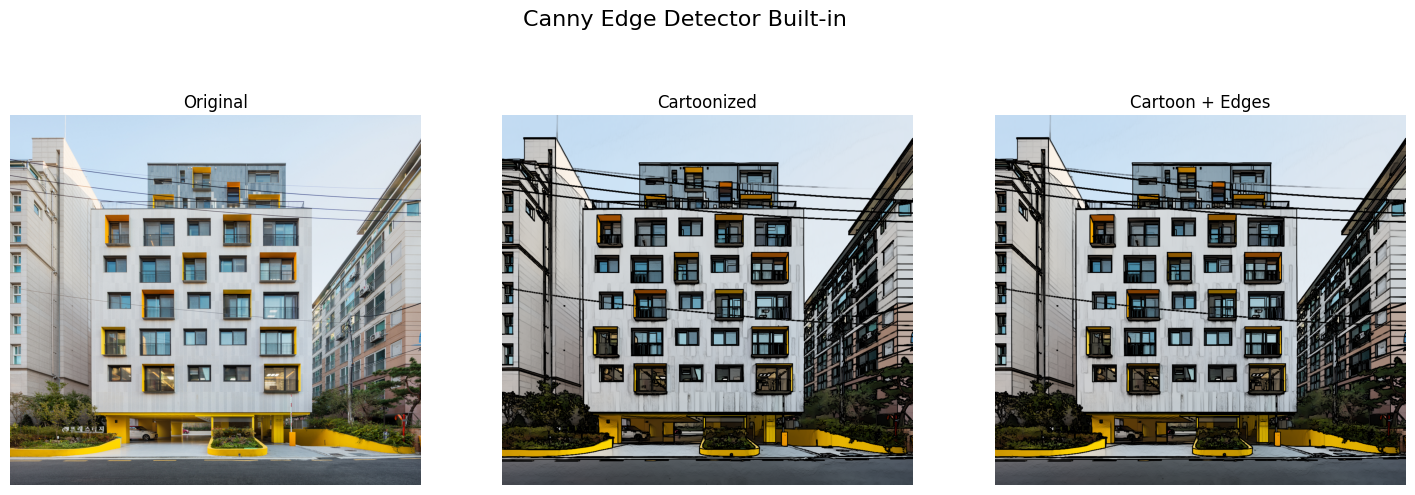

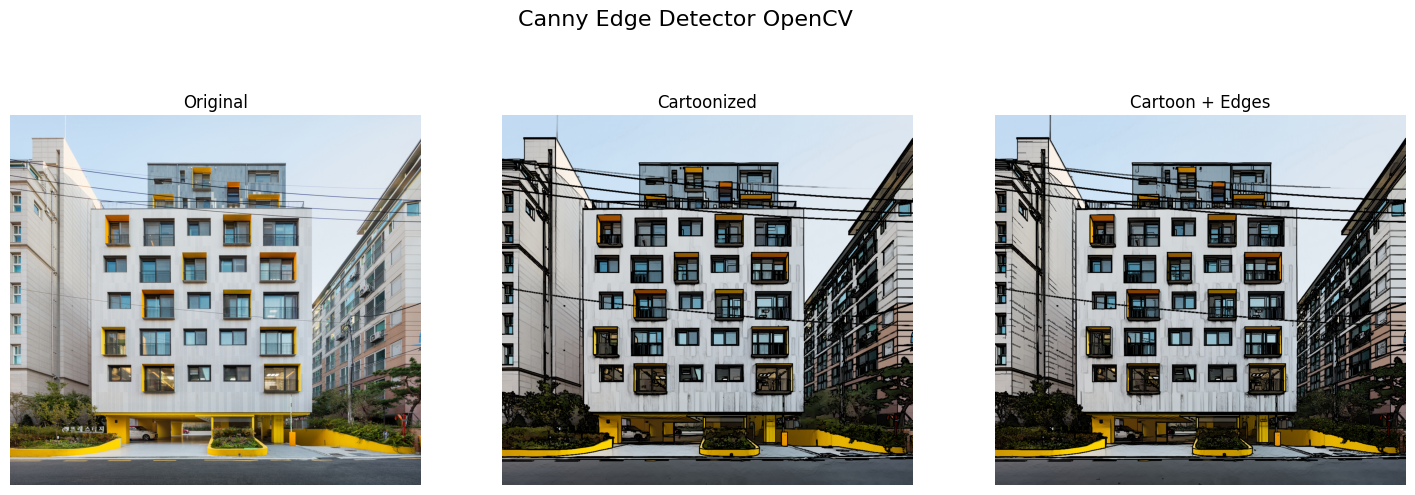

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

class CannyEdgeDetector:
    def __init__(self, img, low_thresh=100, high_thresh=200):
        self.original = img
        self.gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        self.low_thresh = low_thresh
        self.high_thresh = high_thresh
        self.gaussian_blur = None
        self.gradient_magnitude = None
        self.edges = None
    
    def apply_gaussian_blur(self, kernel_size=3):
        self.gaussian_blur = cv.GaussianBlur(self.gray, (kernel_size, kernel_size), 2)
        return self.gaussian_blur
    
    def calculate_gradient(self):
        gx = cv.Sobel(self.gaussian_blur, cv.CV_64F, 1, 0, ksize=9)
        gy = cv.Sobel(self.gaussian_blur, cv.CV_64F, 0, 1, ksize=9)
        self.gradient_magnitude = np.sqrt(gx**2 + gy**2)
        return self.gradient_magnitude
    
    def detect_edges(self):
        self.edges = cv.Canny(self.gaussian_blur, self.low_thresh, self.high_thresh)
        return self.edges

    def cartoonize(self):
        cartoon = cv.stylization(self.original, sigma_s=150, sigma_r=0.25)
        edges_colored = cv.cvtColor(self.edges, cv.COLOR_GRAY2BGR)
        edges_inverted = cv.bitwise_not(edges_colored)

        cartoon_with_edges = cv.bitwise_and(cartoon, edges_inverted)
        return cartoon, cartoon_with_edges
 
    def plot_results(self, cartoon, cartoon_with_edges, namePlot = "Canny Edge Detector Built-in"):
        fig, ax = plt.subplots(1, 3, figsize=(18, 6))

        ax[0].imshow(cv.cvtColor(self.original, cv.COLOR_BGR2RGB))
        ax[0].set_title("Original")
        ax[0].axis("off")

        ax[1].imshow(cv.cvtColor(cartoon, cv.COLOR_BGR2RGB))
        ax[1].set_title("Cartoonized")
        ax[1].axis("off")

        ax[2].imshow(cv.cvtColor(cartoon_with_edges, cv.COLOR_BGR2RGB))
        ax[2].set_title("Cartoon + Edges")
        ax[2].axis("off")
        plt.suptitle(namePlot, fontsize=16)
        plt.show()


canny = CannyEdgeDetector(img, 100, 250)
canny.apply_gaussian_blur()
canny.calculate_gradient()
canny.detect_edges()

cartoon, cartoon_with_edges = canny.cartoonize()

# So sánh với OpenCV Canny + cartoon
canny.plot_results(cartoon, cartoon_with_edges, namePlot = "Canny Edge Detector Built-in")
canny.plot_results(cartoon, cartoon_with_edges_openCv , namePlot = "Canny Edge Detector OpenCV")

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

class CannyEdgeDetector:
    def __init__(self, img, low_thresh=100, high_thresh=200):
        self.original = img
        self.gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        self.low_thresh = low_thresh
        self.high_thresh = high_thresh
        
    def combine_with_color_edges(self):
        # Làm mượt ảnh gốc kiểu cartoon (giữ màu)
        cartoon = cv.stylization(self.original, sigma_s=150, sigma_r=0.25)
        edges = self.final_edges
        
        # Nghịch đảo biên để nét đen, nền trắng
        edges_inverted = cv.bitwise_not(edges)
        edges_color = cv.cvtColor(edges_inverted, cv.COLOR_GRAY2BGR)
        
        # Kết hợp ảnh cartoon với biên
        cartoon_with_edges = cv.bitwise_and(cartoon, edges_color)
        self.cartoon = cartoon
        self.cartoon_with_edges = cartoon_with_edges
        print("\n[Cartoon Combination Completed]")
        return cartoon, cartoon_with_edges

    # 1 Gaussian Blur
    def apply_gaussian_blur(self, kernel_size=5, sigma=1.4):
        self.gaussian_blur = cv.GaussianBlur(self.gray, (kernel_size, kernel_size), sigma)
        print("\n[Gaussian Blur] Sample values:")
        print(self.gaussian_blur[:5, :5])
        return self.gaussian_blur

    # 💡 Thêm hàm hiển thị Sobel Operator
    def show_sobel_kernels(self):
        Gx = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])
        Gy = np.array([[1, 2, 1],
                       [0, 0, 0],
                       [-1, -2, -1]])

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        cmap = 'coolwarm'

        for k, (mat, title) in enumerate(zip([Gx, Gy], [r"Sobel $G_x$", r"Sobel $G_y$"])):
            ax[k].imshow(mat, cmap=cmap, interpolation='nearest')
            ax[k].set_title(title, fontsize=14)
            ax[k].axis("off")
            # Hiển thị giá trị từng ô
            for (i, j), val in np.ndenumerate(mat):
                ax[k].text(j, i, f"{val}", ha='center', va='center', color='black', fontsize=12, fontweight='bold')

        plt.suptitle("Sobel Operator Example", fontsize=16)
        plt.tight_layout()
        plt.show()

    # 2 Tính gradient (Sobel)
    def calculate_gradient(self):
        # --- Hiển thị kernel Sobel ---
        Gx_kernel = np.array([[-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1]])
        Gy_kernel = np.array([[1, 2, 1],
                              [0, 0, 0],
                              [-1, -2, -1]])

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        cmap = 'coolwarm'
        for k, (mat, title) in enumerate(zip([Gx_kernel, Gy_kernel], [r"Sobel $G_x$", r"Sobel $G_y$"])):
            ax[k].imshow(mat, cmap=cmap, interpolation='nearest')
            ax[k].set_title(title, fontsize=14)
            ax[k].axis("off")
            for (i, j), val in np.ndenumerate(mat):
                ax[k].text(j, i, f"{val}", ha='center', va='center', color='black', fontsize=12, fontweight='bold')

        plt.suptitle("Sobel Operator Example (Kernel)", fontsize=16)
        plt.tight_layout()
        plt.show()

        # --- Áp dụng Sobel để tính gradient ---
        Gx = cv.Sobel(self.gaussian_blur, cv.CV_64F, 1, 0, ksize=3)
        Gy = cv.Sobel(self.gaussian_blur, cv.CV_64F, 0, 1, ksize=3)
        magnitude = np.sqrt(Gx**2 + Gy**2)
        direction = np.arctan2(Gy, Gx)  # radian

        self.Gx, self.Gy = Gx, Gy
        self.gradient_magnitude = magnitude
        self.gradient_direction = direction

        # --- Hiển thị ảnh kết quả Sobel thực tế ---
        fig, ax = plt.subplots(1, 3, figsize=(14, 5))
        ax[0].imshow(np.abs(Gx), cmap='gray')
        ax[0].set_title("Gradient theo trục X ($G_x$)")
        ax[0].axis("off")

        ax[1].imshow(np.abs(Gy), cmap='gray')
        ax[1].set_title("Gradient theo trục Y ($G_y$)")
        ax[1].axis("off")

        ax[2].imshow(magnitude, cmap='gray')
        ax[2].set_title("Độ lớn Gradient ($\sqrt{G_x^2 + G_y^2}$)")
        ax[2].axis("off")

        plt.suptitle("Minh họa kết quả Sobel Operator (Ảnh thực tế)", fontsize=16)
        plt.tight_layout()
        plt.show()

        print("\n[Gradient Magnitude] Sample values:")
        print(np.round(magnitude[:5, :5], 2))
        print("\n[Gradient Direction (degrees)] Sample values:")
        print(np.round(np.degrees(direction[:5, :5]), 2))
        return magnitude, direction


    # 3 Non-Maximum Suppression
    def non_max_suppression(self):
        M, N = self.gradient_magnitude.shape
        Z = np.zeros((M, N), dtype=np.float32)
        angle = self.gradient_direction * 180.0 / np.pi
        angle[angle < 0] += 180

        for i in range(1, M-1):
            for j in range(1, N-1):
                q = 255
                r = 255
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = self.gradient_magnitude[i, j+1]
                    r = self.gradient_magnitude[i, j-1]
                elif (22.5 <= angle[i, j] < 67.5):
                    q = self.gradient_magnitude[i+1, j-1]
                    r = self.gradient_magnitude[i-1, j+1]
                elif (67.5 <= angle[i, j] < 112.5):
                    q = self.gradient_magnitude[i+1, j]
                    r = self.gradient_magnitude[i-1, j]
                elif (112.5 <= angle[i, j] < 157.5):
                    q = self.gradient_magnitude[i-1, j-1]
                    r = self.gradient_magnitude[i+1, j+1]

                if (self.gradient_magnitude[i, j] >= q) and (self.gradient_magnitude[i, j] >= r):
                    Z[i, j] = self.gradient_magnitude[i, j]
                else:
                    Z[i, j] = 0

        self.non_max = Z
        print("\n[Non-Max Suppression] Sample values:")
        print(np.round(Z[:5, :5], 2))
        return Z

    # 4 Double Threshold
    def double_threshold(self):
        high, low = self.high_thresh, self.low_thresh
        strong, weak = 255, 75
        res = np.zeros_like(self.non_max, dtype=np.uint8)

        strong_i, strong_j = np.where(self.non_max >= high)
        weak_i, weak_j = np.where((self.non_max <= high) & (self.non_max >= low))

        res[strong_i, strong_j] = strong
        res[weak_i, weak_j] = weak

        self.thresholded = res
        print("\n[Double Threshold] strong pixels:", len(strong_i), "| weak pixels:", len(weak_i))
        return res

    # 5 Edge Tracking by Hysteresis
    def hysteresis(self):
        M, N = self.thresholded.shape
        weak, strong = 75, 255

        for i in range(1, M-1):
            for j in range(1, N-1):
                if self.thresholded[i, j] == weak:
                    if np.any(self.thresholded[i-1:i+2, j-1:j+2] == strong):
                        self.thresholded[i, j] = strong
                    else:
                        self.thresholded[i, j] = 0
        self.final_edges = self.thresholded
        print("\n[Hysteresis Completed]")
        return self.final_edges

    # 6 Plot intermediate results
    def plot_all(self):
        titles = [
            "Gray", "Gaussian Blur", "Gradient Magnitude",
            "Non-Max Suppression", "Double Threshold", "Final Edges"
        ]
        imgs = [
            self.gray, self.gaussian_blur, self.gradient_magnitude,
            self.non_max, self.thresholded, self.final_edges
        ]

        plt.figure(figsize=(18, 10))
        for i in range(6):
            plt.subplot(2, 3, i+1)
            plt.imshow(imgs[i], cmap='gray')
            plt.title(titles[i])
            plt.axis('off')
        plt.tight_layout()
        plt.show()



[Gaussian Blur] Sample values:
[[213 213 213 213 213]
 [213 213 212 212 213]
 [212 212 212 212 212]
 [212 212 212 212 213]
 [212 212 212 213 213]]


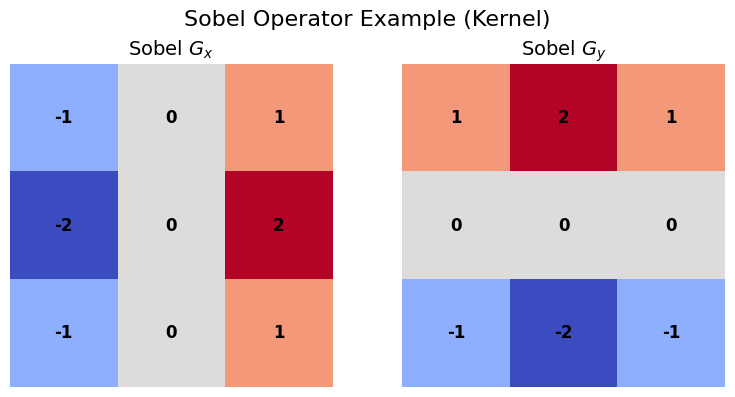

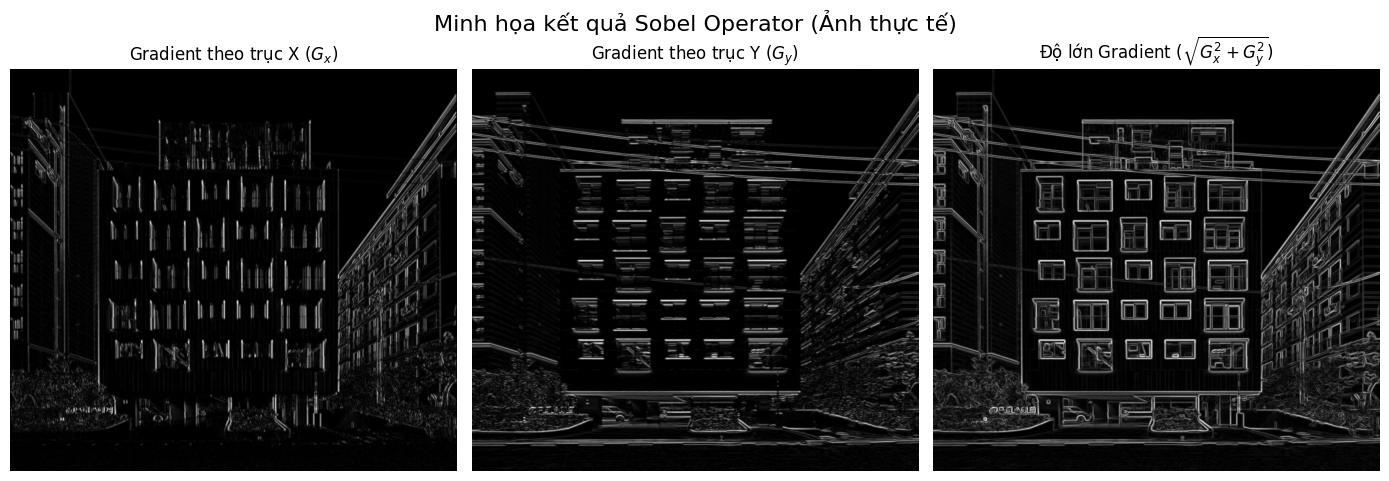


[Gradient Magnitude] Sample values:
[[0.   2.   2.   2.   2.  ]
 [4.   4.47 4.47 4.47 4.24]
 [4.   3.16 1.41 2.   4.  ]
 [0.   0.   1.41 4.24 4.24]
 [4.   4.   4.47 4.24 1.41]]

[Gradient Direction (degrees)] Sample values:
[[   0.    180.    180.      0.      0.  ]
 [ -90.   -116.57 -116.57  -63.43  -45.  ]
 [ -90.   -108.43 -135.      0.      0.  ]
 [   0.      0.     45.     45.     45.  ]
 [  90.     90.     63.43   45.     45.  ]]

[Non-Max Suppression] Sample values:
[[0.   0.   0.   0.   0.  ]
 [0.   4.47 4.47 4.47 4.24]
 [0.   0.   0.   0.   4.  ]
 [0.   0.   0.   0.   4.24]
 [0.   4.   4.47 4.24 1.41]]

[Double Threshold] strong pixels: 32422 | weak pixels: 43638

[Hysteresis Completed]

[Cartoon Combination Completed]


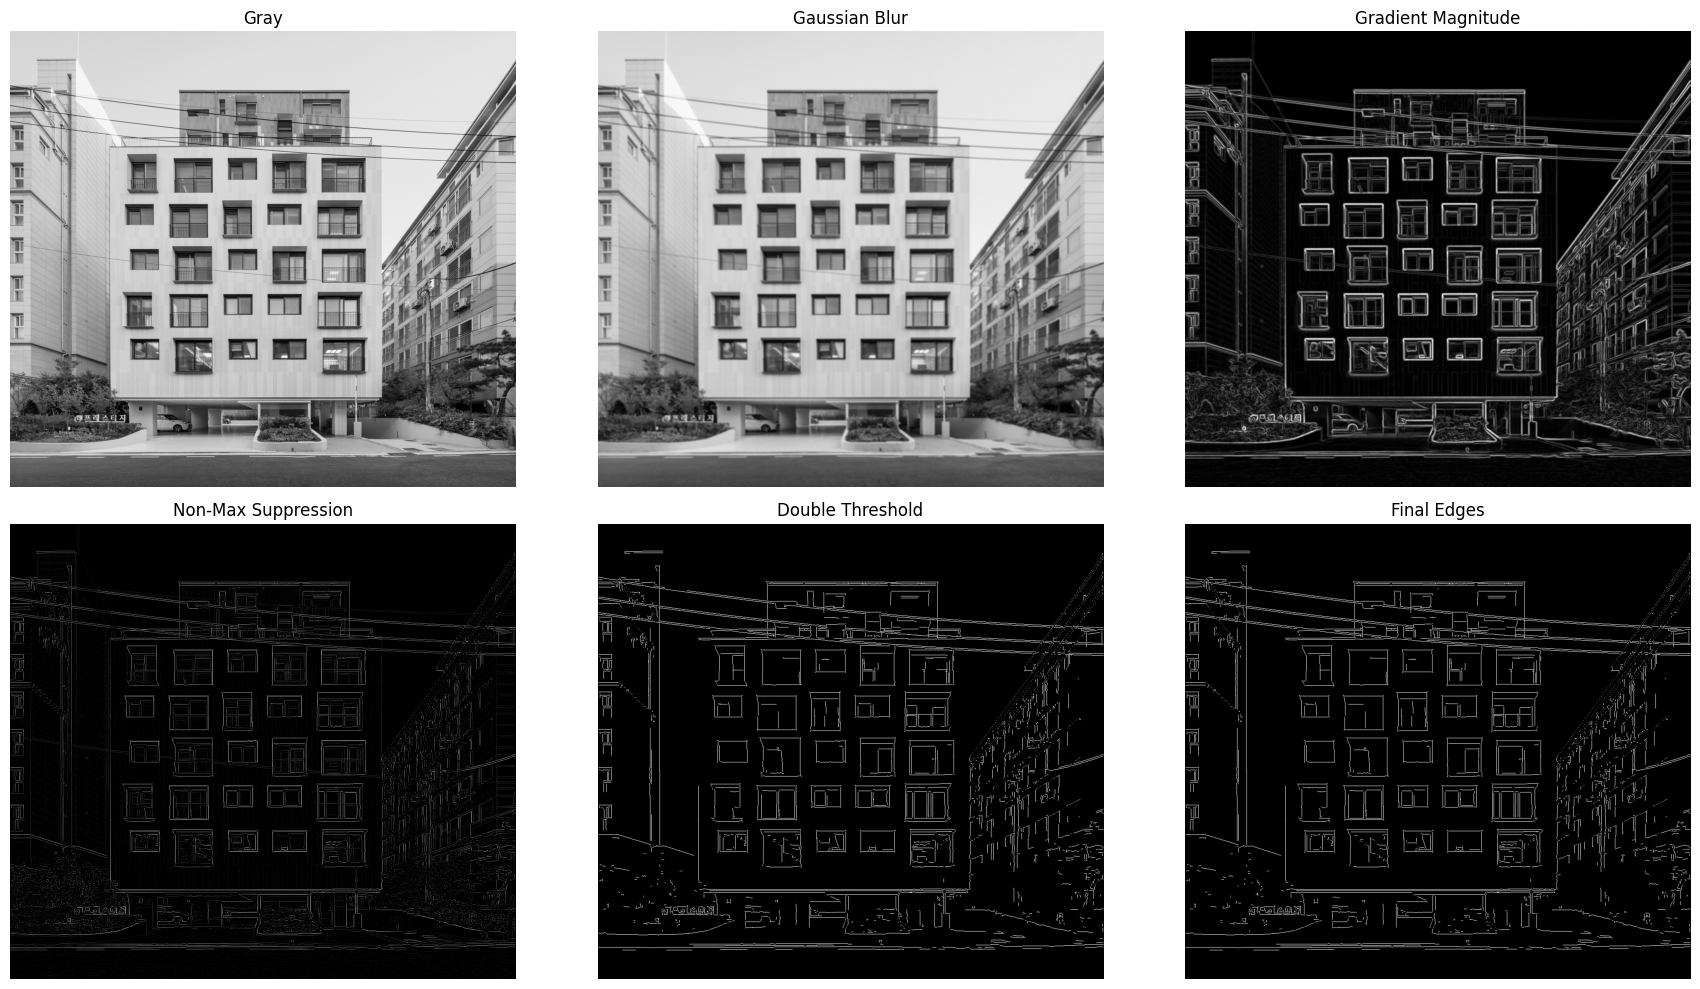

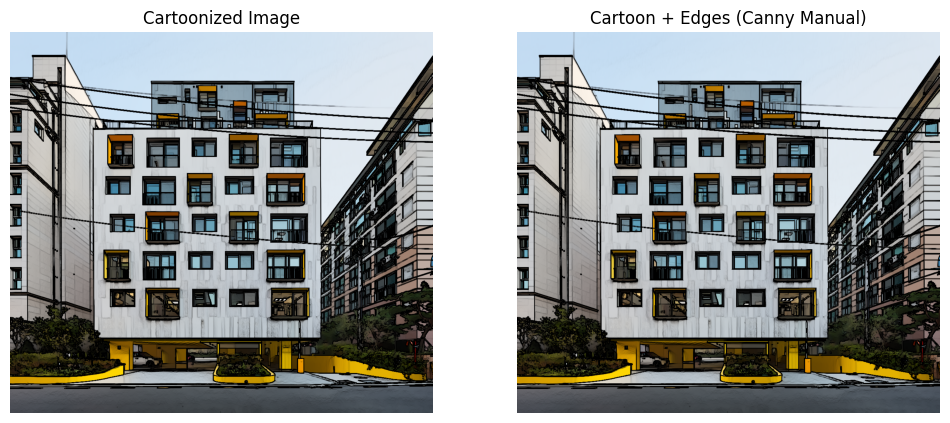

In [18]:
img = cv.imread(r"assets\building.jpg")

canny = CannyEdgeDetector(img, low_thresh=50, high_thresh=150)
canny.apply_gaussian_blur()
canny.calculate_gradient()
canny.non_max_suppression()
canny.double_threshold()
canny.hysteresis()

# Tạo ảnh màu cartoon
cartoon, cartoon_with_edges = canny.combine_with_color_edges()

# Hiển thị tất cả
canny.plot_all()

# Hiển thị riêng phần kết quả cuối
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(cartoon, cv.COLOR_BGR2RGB))
plt.title("Cartoonized Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(cartoon_with_edges, cv.COLOR_BGR2RGB))
plt.title("Cartoon + Edges (Canny Manual)")
plt.axis("off")
plt.show()
